<a href="https://colab.research.google.com/github/almazav/Masters-Project/blob/main/GNN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Embeding Methods

Objcetcive of embeding is to find a simpler representation via the ENC, with the condition $S_G(u,v)≈S_E(Z_u,Z_v)$.<br>Hot to perform ENC? various methods including agregation and update.<br> 
## Deep walk
what is the meaning of similarity? The similarity between nodes $u$ and $v$ can be defined as the probabilityu of visiting $u$ if do a random walk on a graph starting at node $v$ in $T$ steps, $S_G(u,v)=p(u|v)$.<br> The similarity on the embedig space $S_E(Z_u,Z_v)$ we use a softmax probability function of the encoded nodes as follows: $S_E(Z_u,Z_v)=exp(Z_u^TZ_v)/∑_{k\in V} exp(Z_u^TZ_v)$.<br>In a deep walk method the ENC is done via look up table.
### Deep walk pipeline
The ENC map all the information of a given node into a $d$ dimensional table, so a node $u$ is maped with the ENC to a $d$ dimensional vector $Z_u$. The values on the table are randomly selected and the goal is to minimize the loss function of the $S_E$ as follows: $l = \sum_{(u,v)\in d} - log(S_E(Z_u,Z_v))$ 
### Downsides 
* computational expensive
* no feature data just nodes and edges 




## Deep walk example with karate club

In [13]:
#pip install karateclub

In [28]:

import networkx as nx
from karateclub import DeepWalk
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [2]:
#load data
G = nx.karate_club_graph()
print(f"""Number of nodes (club-members): {len(G.nodes)}""")

Number of nodes (club-members): 34


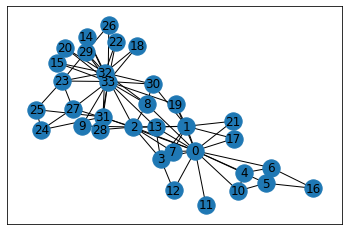

In [4]:
#edges represent if particpants talk to each other
nx.draw_networkx(G)

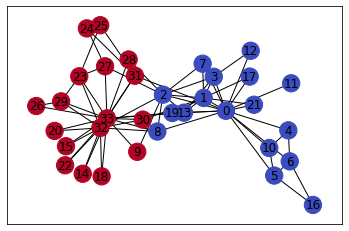

In [9]:
#plot the graph with labels
labels =[]
for i in G.nodes:
  club_names = G.nodes[i]['club']
  labels.append(1 if club_names=='Officer' else 0) #clubs: 'Officer' or 'Mr.Hi'
layout_pos = nx.spring_layout(G)  
nx.draw_networkx(G,pos = layout_pos,node_color= labels,cmap='coolwarm')

In [18]:
#perform node embeding using deep walk  https://karateclub.readthedocs.io/en/latest/
Deepwalk_model = DeepWalk(walk_number=10,walk_length=80,dimensions=124)
Deepwalk_model.fit(G)
embedding = Deepwalk_model.get_embedding()

In [19]:
print(f'Embedding array shape (nodesXfeatures): {embedding.shape}')

Embedding array shape (nodesXfeatures): (34, 124)


In [22]:
# performing a PCA for a low dimensional plot of the nodes x fetaures 
PCA_model = sklearn.decomposition.PCA(n_components=2)
lowdimension_embedding = PCA_model.fit_transform(embedding)
print(f'Low Dimensional Embedding representation (nodesX2): {lowdimension_embedding.shape}')

Low Dimensional Embedding representation (nodesX2): (34, 2)


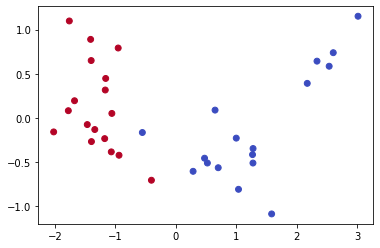

In [27]:
plt.scatter(lowdimension_embedding[:,0],lowdimension_embedding[:,1],c = labels,s = 35,cmap='coolwarm')
plt.show()

In [29]:
#Node classification using embedded model
x_train,x_test,y_train,y_test= train_test_split(embedding, labels, test_size = 0.3)

In [30]:
ML_model = LogisticRegression(random_state=0).fit(x_train,y_train)
y_predict= ML_model.predict(x_test)
ML_acc = roc_auc_score(y_test,y_predict)
print(f'AUC: {ML_acc}')

AUC: 0.9
